# Red_Wine_Quality

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math

from scipy.io import arff
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (confusion_matrix,plot_confusion_matrix,
                            ConfusionMatrixDisplay,accuracy_score,f1_score,
                            mean_squared_error, mean_absolute_error, max_error,
                            r2_score, explained_variance_score)

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

## Loading Data

In [257]:
# Datset = pd.read_csv("datasets\Diabetic_Retinopathy\messidor_features.arff") 
Datset = pd.read_csv('/Users/annikatimermanis/Desktop/project/Regression/Regression_Datasets/1_Wine_Quality/Wine_Quality_Red.csv', delimiter=';') 



In [258]:
df = pd.DataFrame(Datset)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Prepration And Analysis

In [259]:
print(np.count_nonzero(Datset==np.nan))

0


In [260]:
frequency = df['quality'].value_counts()
print(frequency)
print("---------------------------")

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
---------------------------


In [50]:
# plt.plot()
# plt.ylabel('Frequency')
# plt.xlabel('Class')
# plt.bar( ("1","0"), frequency)
# plt.suptitle("Distribution")
# plt.show()

# fig, ax = plt.subplots()
# columns = []
# for col in df:
#     columns.append(col)
    
# columns = columns[:-1]
# for col in columns:
#     plt.figure(figsize=(20,6))
#     df[col].value_counts().sort_index().plot.bar()

In [22]:
# sns.pairplot(df, hue="quality")
# print("ok")

In [23]:
# plt.figure(figsize=(17,17))
# sns.heatmap(df.corr(), annot =True);

## Train and Test set

In [261]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1:]

In [262]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.85, test_size=0.15, random_state=0)

y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [263]:
StScale = StandardScaler()
X_train = StScale.fit_transform(X_train)
X_test = StScale.transform(X_test)

## Linear Regression

In [101]:
# polynomial = PolynomialFeatures(1)
# X_train_transformed = polynomial.fit_transform(X_train)
# X_test_transformed = polynomial.transform(X_test) 

In [264]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

LinearRegression()

## Linear Regression Analysis

In [265]:
linear_r_predict = linear_r.predict(X_test)

In [266]:
accuracy1 = mean_squared_error(y_test, linear_r_predict)
accuracy2 = r2_score(y_test, linear_r_predict)
accuracy3 = explained_variance_score(y_test, linear_r_predict)
    
print('                 MINIMIZE: ')
print("Mean squared error\t", accuracy1)
print('                 MAXIMIZE: ')
print("r2 Score\t\t", accuracy2)
print("Explained Variance Score", accuracy3)
print('---------------------------------------------')

                 MINIMIZE: 
Mean squared error	 0.38924746272483957
                 MAXIMIZE: 
r2 Score		 0.35005061882679855
Explained Variance Score 0.35459049157389544
---------------------------------------------


In [44]:
# plt.figure(figsize=(10,10))
# plt.scatter(y_test, linear_r_predict, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

# p1 = max(max(linear_r_predict), max(y_test))
# p2 = min(min(linear_r_predict), min(y_test))
# plt.plot([p1, p2], [p1, p2], 'b-')
# plt.xlabel('True Values', fontsize=15)
# plt.ylabel('Predictions', fontsize=15)
# plt.axis('equal')
# plt.show()

## Support Vector Regression

In [176]:
svr = SVR().fit(X_train, y_train)

In [267]:
parameters = {
    'C': scipy.stats.uniform(1, 1000), 
    'gamma': scipy.stats.uniform(0.01, 1000)
}
svr_model = RandomizedSearchCV(svr, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
svr_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 72.03605819788694, 'gamma': 87.13929970154071}

In [268]:
svr_model.best_estimator_

SVR(C=72.03605819788694, gamma=87.13929970154071)

## Support Vector Regression Analysis

In [269]:
svr_predictions = svr_model.predict(X_test)

In [270]:
accuracy1 = mean_squared_error(y_test, svr_predictions)
accuracy2 = r2_score(y_test, svr_predictions)
accuracy3 = explained_variance_score(y_test, svr_predictions)
print('                 MINIMIZE: ')
print("Mean squared error\t", accuracy1)
print('                 MAXIMIZE: ')
print("r2 Score\t\t", accuracy2)
print("Explained Variance Score", accuracy3)
print('---------------------------------------------')

                 MINIMIZE: 
Mean squared error	 0.5016787538646308
                 MAXIMIZE: 
r2 Score		 0.162317479632342
Explained Variance Score 0.16235496404558247
---------------------------------------------


## Decision Tree Regression

In [278]:
tree = DecisionTreeRegressor().fit(X_train, y_train)

## Decision tree Analysis

In [272]:
tree_predictions = tree.predict(X_test)

In [273]:
accuracy1 = mean_squared_error(y_test, tree_predictions)
accuracy2 = r2_score(y_test, tree_predictions)
accuracy3 = explained_variance_score(y_test, tree_predictions)
print('                 MINIMIZE: ')
print("Mean squared error\t", accuracy1)
print('                 MAXIMIZE: ')
print("r2 Score\t\t", accuracy2)
print("Explained Variance Score", accuracy3)
print('---------------------------------------------')

                 MINIMIZE: 
Mean squared error	 0.6208333333333333
                 MAXIMIZE: 
r2 Score		 -0.0366419294990723
Explained Variance Score -0.018523886827458425
---------------------------------------------


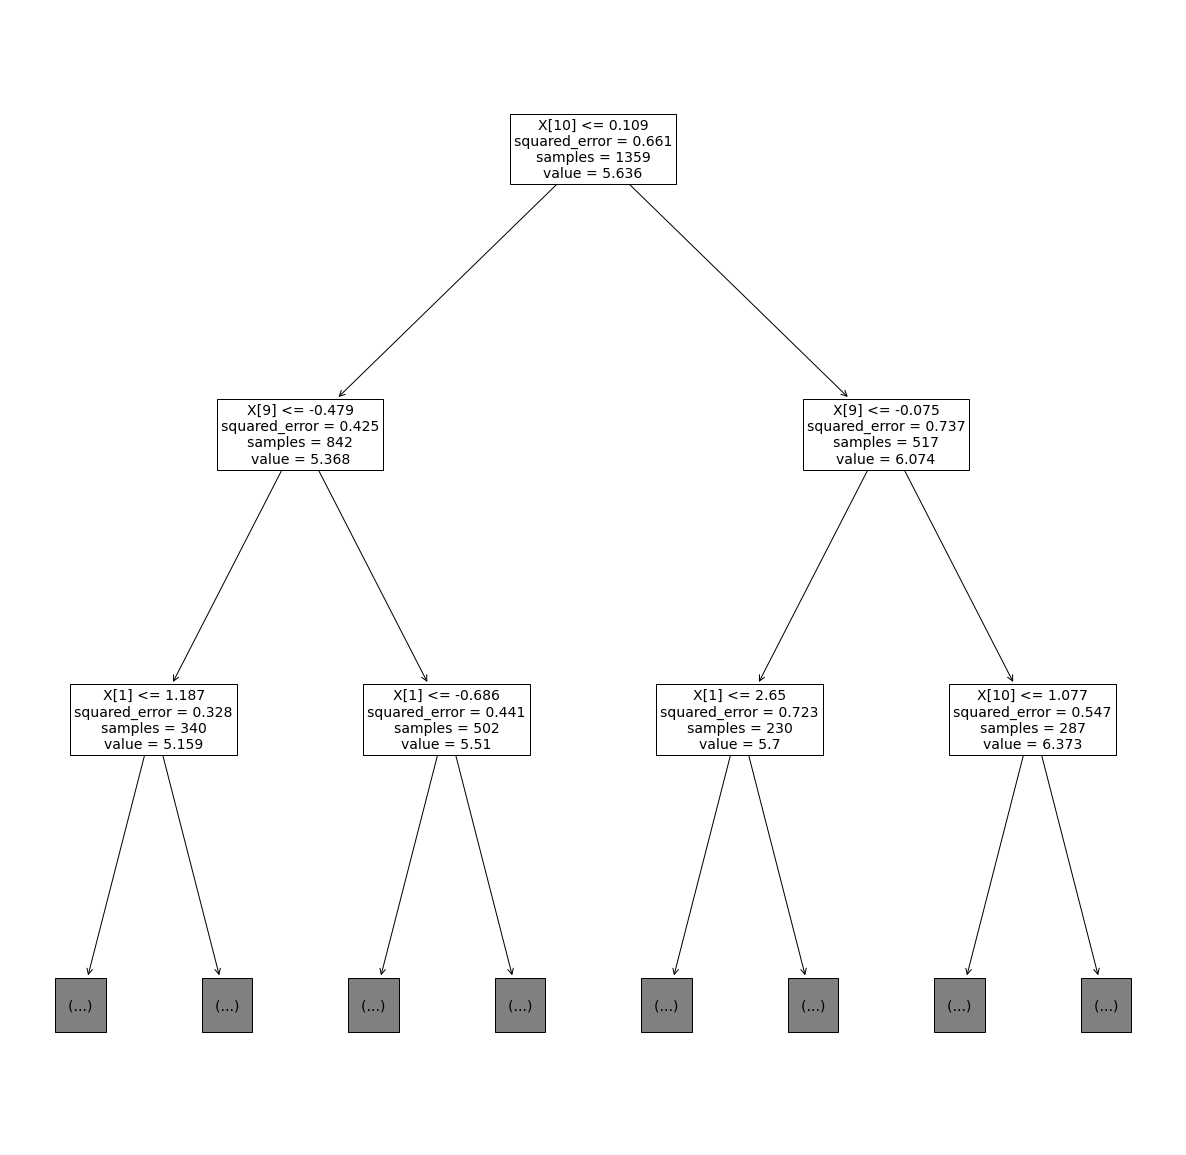

In [274]:
plt.figure(figsize=(21,21))
plot_tree(tree, max_depth = 2, fontsize=14);

## Random Forest Regression

In [275]:
forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)

## Random Forest Analysis

In [276]:
forest_predictions = forest.predict(X_test)

In [277]:
accuracy1 = mean_squared_error(y_test, forest_predictions)
accuracy2 = r2_score(y_test, forest_predictions)
accuracy3 = explained_variance_score(y_test, forest_predictions)
print('                 MINIMIZE: ')
print("Mean squared error\t", accuracy1)
print('                 MAXIMIZE: ')
print("r2 Score\t\t", accuracy2)
print("Explained Variance Score", accuracy3)
print('---------------------------------------------')

                 MINIMIZE: 
Mean squared error	 0.33835583333333336
                 MAXIMIZE: 
r2 Score		 0.4350273654916512
Explained Variance Score 0.43964426020408154
---------------------------------------------


## K Nearest Neighbours Regression

In [50]:
# knn = KNeighborsClassifier()

In [85]:
# parameters = {
#     'n_neighbors': range(1, 100), 
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
#     'weights': ['uniform', 'distance'], 
#     'leaf_size': scipy.stats.uniform(1, 50)
# }
# knn_model = RandomizedSearchCV(knn, parameters,verbose=10,random_state=0).fit(X_train, y_train)
# knn_model.best_params_

In [56]:
# knn_model.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=41.60843643877466,
                     n_neighbors=47)

## KNN Analysis

In [57]:
knn_predictions = knn_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.55      0.82      0.66       101
           1       0.78      0.48      0.60       130

    accuracy                           0.63       231
   macro avg       0.67      0.65      0.63       231
weighted avg       0.68      0.63      0.63       231

[[83 18]
 [67 63]]
0.6320346320346321
0.6252257337773095
0.6292554898887861


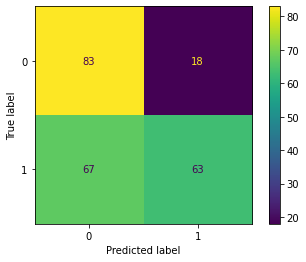

In [59]:
print(classification_report(y_test, knn_predictions))
print(confusion_matrix (y_test, knn_predictions))
print(accuracy_score(y_test, knn_predictions))
print(f1_score(y_test, knn_predictions, average='weighted'))
print(f1_score(y_test, knn_predictions, average='macro'))
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions);